<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/w5_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai==2.5.3

In [3]:
from google.colab import files 

In [ ]:
files.upload()

In [4]:
!ls

Auto_fraud_detection_dataset.zip  sample_data


In [5]:
!unzip Auto_fraud_detection_dataset.zip

Archive:  Auto_fraud_detection_dataset.zip
  inflating: claims_customer.csv     
  inflating: __MACOSX/._claims_customer.csv  
  inflating: claims_preprocessed.csv  
  inflating: __MACOSX/._claims_preprocessed.csv  
  inflating: claims.csv              
  inflating: __MACOSX/._claims.csv   
  inflating: customers_preprocessed.csv  
  inflating: __MACOSX/._customers_preprocessed.csv  
  inflating: customers.csv           
  inflating: __MACOSX/._customers.csv  
  inflating: dataset.csv             
  inflating: __MACOSX/._dataset.csv  
  inflating: test.csv                
  inflating: __MACOSX/._test.csv     
  inflating: train.csv               
  inflating: __MACOSX/._train.csv    
  inflating: upsampled_train.csv     
  inflating: __MACOSX/._upsampled_train.csv  


In [27]:
from fastai.tabular.all import *

In [5]:
import pandas as pd
from pathlib import Path

In [6]:
train = pd.read_csv('./train.csv')
valid = pd.read_csv('./test.csv')

In [7]:
df = pd.concat([train, valid])

In [8]:
df.describe()

,fraud,incident_type_theft,policy_state_ca,policy_deductable,num_witnesses,policy_state_or,incident_month,customer_gender_female,num_insurers_past_5_years,customer_gender_male,...,driver_relationship_other,policy_state_id,incident_hour,vehicle_claim,incident_type_collision,policy_annual_premium,policy_state_az,policy_state_wa,collision_type_rear,collision_type_front
count,20000.000000,20000.000000,20000.0000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.00000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.030000,0.048200,0.6204,751.13000,0.866100,0.070000,6.713200,0.372400,1.412200,0.576500,...,0.03940,0.02730,11.786800,17426.083700,0.857200,2925.400000,0.113600,0.121000,0.220900,0.425400
std,0.170591,0.214194,0.4853,13.57322,1.097921,0.255153,3.654396,0.483456,0.897291,0.494125,...,0.19455,0.16296,5.337918,10043.773599,0.349878,143.516096,0.317333,0.326135,0.414864,0.494416
min,0.000000,0.000000,0.0000,750.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.00000,0.00000,0.000000,1000.000000,0.000000,2150.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.0000,750.00000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,...,0.00000,0.00000,8.000000,10474.250000,1.000000,2900.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.0000,750.00000,0.000000,0.000000,7.000000,0.000000,1.000000,1.000000,...,0.00000,0.00000,12.000000,15000.000000,1.000000,3000.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.0000,750.00000,2.000000,0.000000,10.000000,1.000000,1.000000,1.000000,...,0.00000,0.00000,16.000000,22005.500000,1.000000,3000.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.0000,1100.00000,5.000000,1.000000,12.000000,1.000000,5.000000,1.000000,...,1.00000,1.00000,23.000000,51051.000000,1.000000,3000.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.columns

Index(['fraud', 'incident_type_theft', 'policy_state_ca', 'policy_deductable',
       'num_witnesses', 'policy_state_or', 'incident_month',
       'customer_gender_female', 'num_insurers_past_5_years',
       'customer_gender_male', 'total_claim_amount',
       'authorities_contacted_police', 'incident_day', 'collision_type_side',
       'customer_age', 'customer_education', 'driver_relationship_child',
       'driver_relationship_spouse', 'injury_claim', 'incident_dow',
       'collision_type_na', 'incident_severity', 'driver_relationship_self',
       'num_claims_past_year', 'months_as_customer', 'auto_year',
       'num_vehicles_involved', 'policy_state_nv',
       'authorities_contacted_ambulance', 'num_injuries', 'policy_liability',
       'police_report_available', 'driver_relationship_na',
       'incident_type_breakin', 'authorities_contacted_none',
       'authorities_contacted_fire', 'driver_relationship_other',
       'policy_state_id', 'incident_hour', 'vehicle_claim',
    

In [10]:
dep_var = ['fraud']
cat_vars = ['incident_type_theft', 'policy_state_ca', 'policy_deductable',
       'num_witnesses', 'policy_state_or', 'incident_month',
       'customer_gender_female', 
       'customer_gender_male',
       'authorities_contacted_police', 'incident_day', 'collision_type_side',
       'customer_age', 'customer_education', 'driver_relationship_child',
       'driver_relationship_spouse', 'injury_claim', 'incident_dow',
       'collision_type_na', 'incident_severity', 'driver_relationship_self',
       'num_claims_past_year', 'months_as_customer', 'auto_year',
       'num_vehicles_involved', 'policy_state_nv',
       'authorities_contacted_ambulance', 'num_injuries', 'policy_liability',
       'police_report_available', 'driver_relationship_na',
       'incident_type_breakin', 'authorities_contacted_none',
       'authorities_contacted_fire', 'driver_relationship_other',
       'policy_state_id', 'incident_hour', 'vehicle_claim',
       'incident_type_collision', 'policy_state_az',
       'policy_state_wa', 'collision_type_rear', 'collision_type_front']
cont_vars = ['total_claim_amount', 'num_insurers_past_5_years','policy_annual_premium', ]

In [11]:
path = Path('/content')

In [24]:
len(train), len(df)

(16000, 20000)

In [23]:
emb_szs = [10]*len(cat_vars)

In [75]:
dls = TabularDataLoaders.from_df(df, path, cat_names = cat_vars, cont_names = cont_vars, y_names = dep_var, valid_idx=range(16000, 20000), procs = [Categorify, FillMissing, Normalize], y_block = CategoryBlock())

In [76]:
learn = tabular_learner(dls, layers = [200, 100], metrics = accuracy)

SuggestedLRs(valley=0.001737800776027143)

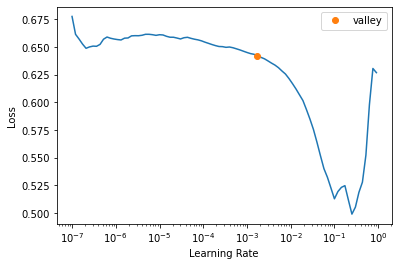

In [77]:
learn.lr_find()

In [78]:
learn.fit_one_cycle(5, lr_max = 0.001737800776027143)

epoch,train_loss,valid_loss,accuracy,time
0,0.244121,0.136506,0.966750,00:04
1,0.094208,0.112697,0.972500,00:04
2,0.066066,0.096133,0.979000,00:04
3,0.046263,0.098678,0.978500,00:04
4,0.025848,0.102512,0.978750,00:04


SuggestedLRs(valley=4.365158383734524e-05)

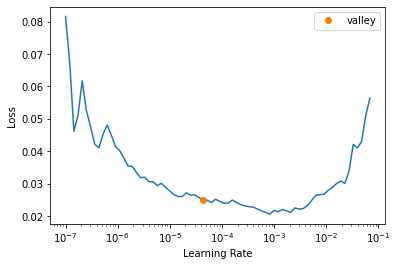

In [79]:
learn.lr_find()

In [81]:
test_df = valid.copy()
test_df.drop(['fraud'], axis=1, inplace=True)
dl = learn.dls.test_dl(test_df)

In [85]:
yhat= learn.get_preds(dl=dl)

In [99]:
y = valid['fraud']

In [97]:
yhat = np.array(yhat[0].argmax(1))

In [100]:
y = y.to_numpy()

In [101]:
yhat, y

(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [102]:
from sklearn.metrics import accuracy_score

In [106]:
print("Accuracy is : ", accuracy_score(y,yhat)*100)

Accuracy is :  97.75


In [107]:
#Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y, yhat))
print(classification_report(y, yhat))

[[3861   15]
 [  75   49]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3876
           1       0.77      0.40      0.52       124

    accuracy                           0.98      4000
   macro avg       0.87      0.70      0.75      4000
weighted avg       0.97      0.98      0.97      4000



In [108]:
from sklearn.metrics import precision_recall_curve

y_score = np.array(learn.get_preds(dl=dl)[0])[:, 1]
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y, y_score)



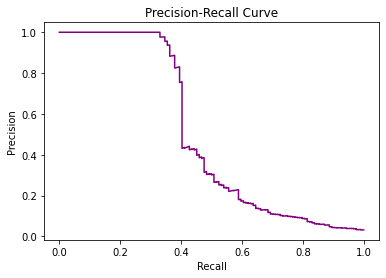

In [110]:
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()